In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random

In [2]:
import sys
print(sys.getrecursionlimit())

3000


In [3]:
sys.setrecursionlimit(15000)

## Importing the Subset Data

In [4]:
df = pd.read_csv('yahoo_adds_data.csv', index_col=0)
df.head()

,Day,anon_account_id,rank,avg_bid,impressions,clicks,keyword_1,keyword_2,keyword_3,keyword_4,...,keyword_1553,keyword_1554,keyword_1555,keyword_1556,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,1500.0,2.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,2370.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.000667,0.0,0.0


In [5]:
len(df.columns)

1568

In [6]:
dependent = ['impressions', 'clicks', 'ctr', 'impressions_per_dollar', 'clicks_per_dollar', 'ctr_per_dollar']
independent = list(df.columns.difference(dependent))
independent

['Day',
 'anon_account_id',
 'avg_bid',
 'keyword_1',
 'keyword_10',
 'keyword_100',
 'keyword_1000',
 'keyword_1001',
 'keyword_1002',
 'keyword_1003',
 'keyword_1004',
 'keyword_1005',
 'keyword_1006',
 'keyword_1007',
 'keyword_1008',
 'keyword_1009',
 'keyword_101',
 'keyword_1010',
 'keyword_1011',
 'keyword_1012',
 'keyword_1013',
 'keyword_1014',
 'keyword_1015',
 'keyword_1016',
 'keyword_1017',
 'keyword_1018',
 'keyword_1019',
 'keyword_102',
 'keyword_1020',
 'keyword_1021',
 'keyword_1022',
 'keyword_1023',
 'keyword_1024',
 'keyword_1025',
 'keyword_1026',
 'keyword_1027',
 'keyword_1028',
 'keyword_1029',
 'keyword_103',
 'keyword_1030',
 'keyword_1031',
 'keyword_1032',
 'keyword_1033',
 'keyword_1034',
 'keyword_1035',
 'keyword_1036',
 'keyword_1037',
 'keyword_1038',
 'keyword_1039',
 'keyword_104',
 'keyword_1040',
 'keyword_1041',
 'keyword_1042',
 'keyword_1043',
 'keyword_1044',
 'keyword_1045',
 'keyword_1046',
 'keyword_1047',
 'keyword_1048',
 'keyword_1049',
 

In [7]:
keyword_list = sorted(list(set(independent).difference(['rank', 'Day', 'anon_account_id', 'keyword_count', 'num_competitors', 'avg_bid'])))
len(keyword_list)

1556

In [8]:
keywords = ' + '.join(keyword_list)
keywords

'keyword_1 + keyword_10 + keyword_100 + keyword_1000 + keyword_1001 + keyword_1002 + keyword_1003 + keyword_1004 + keyword_1005 + keyword_1006 + keyword_1007 + keyword_1008 + keyword_1009 + keyword_101 + keyword_1010 + keyword_1011 + keyword_1012 + keyword_1013 + keyword_1014 + keyword_1015 + keyword_1016 + keyword_1017 + keyword_1018 + keyword_1019 + keyword_102 + keyword_1020 + keyword_1021 + keyword_1022 + keyword_1023 + keyword_1024 + keyword_1025 + keyword_1026 + keyword_1027 + keyword_1028 + keyword_1029 + keyword_103 + keyword_1030 + keyword_1031 + keyword_1032 + keyword_1033 + keyword_1034 + keyword_1035 + keyword_1036 + keyword_1037 + keyword_1038 + keyword_1039 + keyword_104 + keyword_1040 + keyword_1041 + keyword_1042 + keyword_1043 + keyword_1044 + keyword_1045 + keyword_1046 + keyword_1047 + keyword_1048 + keyword_1049 + keyword_105 + keyword_1050 + keyword_1051 + keyword_1052 + keyword_1053 + keyword_1054 + keyword_1055 + keyword_1056 + keyword_1057 + keyword_1058 + keywo

## Model 1 - Metrics vs Rank + Day + Acc_ID + Key_dummy

## Regression 1 - Impressions vs all predictors

In [21]:
model1 = smf.ols(formula = 'impressions ~ rank + Day + anon_account_id + ' + keywords, data = df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:            impressions   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.325
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:40:03   Log-Likelihood:            -4.1892e+05
No. Observations:               84774   AIC:                         8.412e+05
Df Residuals:                   83096   BIC:                         8.569e+05
Df Model:                        1677                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Regression 2 - Clicks vs all predictors

In [22]:
model2 = smf.ols(formula = 'clicks ~ rank + Day + anon_account_id + ' + keywords, data = df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     9.605
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:41:39   Log-Likelihood:                -47337.
No. Observations:               84774   AIC:                         9.803e+04
Df Residuals:                   83096   BIC:                         1.137e+05
Df Model:                        1677                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Regression 3 - CTR vs all predictors

In [23]:
model3 = smf.ols(formula = 'ctr ~ rank + Day + anon_account_id + ' + keywords, data = df)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    ctr   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4.658
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:43:08   Log-Likelihood:                 75507.
No. Observations:               84774   AIC:                        -1.477e+05
Df Residuals:                   83096   BIC:                        -1.320e+05
Df Model:                        1677                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Model 2 - Metrics vs Rank + Day + Acc_ID + Key_dummy + # Competitors

## Regression 1 - Impressions vs all predictors

In [24]:
model4 = smf.ols(formula = 'impressions ~ rank + Day + anon_account_id + num_competitors + ' + keywords, data = df)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:            impressions   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.337
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:45:04   Log-Likelihood:            -4.1891e+05
No. Observations:               84774   AIC:                         8.412e+05
Df Residuals:                   83095   BIC:                         8.569e+05
Df Model:                        1678                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Regression 2 - Clicks vs all predictors

In [25]:
model5 = smf.ols(formula = 'clicks ~ rank + Day + anon_account_id + num_competitors + ' + keywords, data = df)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     9.637
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:48:51   Log-Likelihood:                -47310.
No. Observations:               84774   AIC:                         9.798e+04
Df Residuals:                   83095   BIC:                         1.137e+05
Df Model:                        1678                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Regression 3 - CTR vs all predictors

In [26]:
model6 = smf.ols(formula = 'ctr ~ rank + Day + anon_account_id + num_competitors + ' + keywords, data = df)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                    ctr   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4.663
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:53:42   Log-Likelihood:                 75513.
No. Observations:               84774   AIC:                        -1.477e+05
Df Residuals:                   83095   BIC:                        -1.320e+05
Df Model:                        1678                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Model 3 - Metrics vs Rank + Day + Acc_ID + Key_dummy + # Competitors + Bid

## Regression 1 - Impressions vs all predictors

In [9]:
model7 = smf.ols(formula = 'impressions ~ rank + Day + anon_account_id + num_competitors + avg_bid + ' + keywords, data = df)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:            impressions   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.340
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:01:25   Log-Likelihood:            -4.1891e+05
No. Observations:               84774   AIC:                         8.412e+05
Df Residuals:                   83094   BIC:                         8.569e+05
Df Model:                        1679                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Regression 2 - Clicks vs all predictors

In [10]:
model8 = smf.ols(formula = 'clicks ~ rank + Day + anon_account_id + num_competitors + avg_bid + ' + keywords, data = df)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     9.634
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:02:34   Log-Likelihood:                -47307.
No. Observations:               84774   AIC:                         9.797e+04
Df Residuals:                   83094   BIC:                         1.137e+05
Df Model:                        1679                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Regression 3 - CTR vs all predictors

In [12]:
model9 = smf.ols(formula = 'ctr ~ rank + Day + anon_account_id + num_competitors + avg_bid + ' + keywords, data = df)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:                    ctr   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4.660
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:04:34   Log-Likelihood:                 75513.
No. Observations:               84774   AIC:                        -1.477e+05
Df Residuals:                   83094   BIC:                        -1.320e+05
Df Model:                        1679                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Model 4 - Metrics vs Rank (Dummy) + Day + Acc_ID + Key_dummy + # Competitors + Bid

In [14]:
df['rank_cat'] = df['rank'].astype(str)
df.head()

,Day,anon_account_id,rank,avg_bid,impressions,clicks,keyword_1,keyword_2,keyword_3,keyword_4,...,keyword_1554,keyword_1555,keyword_1556,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar,rank_cat
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,4,1,0.0,0.000667,0.0,0.0,5
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,4,1,0.0,0.000667,0.0,0.0,4
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,1500.0,2.0,0.0,0,0,0,0,...,0,0,0,4,11,0.0,0.001333,0.0,0.0,3
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,2370.0,1.0,0.0,0,0,0,0,...,0,0,0,4,11,0.0,0.000422,0.0,0.0,3
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,4,11,0.0,0.000667,0.0,0.0,4


## Regression 1 - Impressions vs all predictors

In [15]:
model10 = smf.ols(formula = 'impressions ~ rank_cat + Day + anon_account_id + num_competitors + avg_bid + ' + keywords, data = df)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:            impressions   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.376
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:29:05   Log-Likelihood:            -4.1878e+05
No. Observations:               84774   AIC:                         8.410e+05
Df Residuals:                   83035   BIC:                         8.573e+05
Df Model:                        1738                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Regression 2 - Clicks vs all predictors

In [16]:
model11 = smf.ols(formula = 'clicks ~ rank_cat + Day + anon_account_id + num_competitors + avg_bid + ' + keywords, data = df)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     10.39
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:30:30   Log-Likelihood:                -46509.
No. Observations:               84774   AIC:                         9.650e+04
Df Residuals:                   83035   BIC:                         1.128e+05
Df Model:                        1738                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [17]:
model12 = smf.ols(formula = 'ctr ~ rank_cat + Day + anon_account_id + num_competitors + avg_bid + ' + keywords, data = df)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:                    ctr   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.938
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:32:45   Log-Likelihood:                 75867.
No. Observations:               84774   AIC:                        -1.483e+05
Df Residuals:                   83035   BIC:                        -1.320e+05
Df Model:                        1738                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [5]:
df.head()

,Day,anon_account_id,rank,avg_bid,impressions,clicks,keyword_1,keyword_2,keyword_3,keyword_4,...,keyword_1553,keyword_1554,keyword_1555,keyword_1556,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,1500.0,2.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,2370.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.000667,0.0,0.0


## Summary Visuals and Statistics

In [6]:
df['keyword_count'].mean()

3.29148087857126

In [7]:
df['num_competitors'].mean()

4.87633000684172

In [8]:
import matplotlib.pyplot as plt

In [13]:
df1 = df[['rank', 'impressions']].groupby(['rank']).mean()
df1['rank'] = df1.index
df1.head()

,impressions,rank
rank,,
1,8.523350,1
2,4.495671,2
3,3.866456,3
4,3.885782,4
5,3.566499,5


In [14]:
df2 = df[['rank', 'clicks']].groupby(['rank']).mean()
df2['rank'] = df2.index
df2.head()

,clicks,rank
rank,,
1,0.246782,1
2,0.116047,2
3,0.084603,3
4,0.044827,4
5,0.032748,5


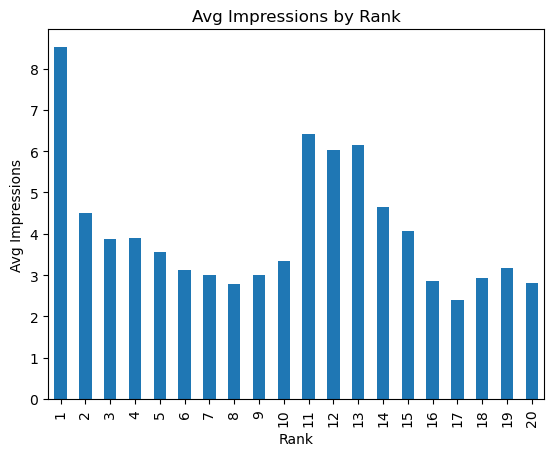

In [18]:
ax = df1[df1['rank']<=20].plot.bar(x='rank', y='impressions')
plt.title('Avg Impressions by Rank')
plt.xlabel('Rank')
plt.ylabel('Avg Impressions')
ax.get_legend().remove()

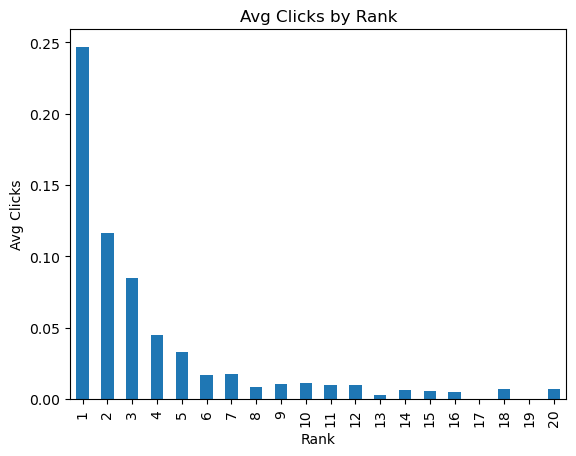

In [19]:
ax = df2[df2['rank']<=20].plot.bar(x='rank', y='clicks')
plt.title('Avg Clicks by Rank')
plt.xlabel('Rank')
plt.ylabel('Avg Clicks')
ax.get_legend().remove()

In [20]:
df['anon_account_id'].nunique()

856